### Optimization of multi-layer neural networks model
- XOR with parameter changed to purposefully convergence
- changed the max iterations parameter, max_iter, from 10,000 to 1,000

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Plot algorithm accuracy score

In [2]:
def plot_decision_boundary(classifier, X, y, title):
    xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
    ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
    step = 0.01
    
    cm = plt.cm.coolwarm_r
    #cm = plt.cm.RdBu
    
    thr = 0.0
    xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
    
    if hasattr(classifier, 'decision_function'):
        Z = classifier.decision_function(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
    
    else:
        Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:, 1]
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), alpha=0.6)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xticks((0.0, 1.0))
    plt.yticks((0.0, 1.0))
    plt.title(title)

Compute XOR

In [6]:
# purposefully non-convergent
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.double)
y_XOR = np.array([0,1,1,0])

# create MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(5,),
    activation='tanh',
    max_iter=1000,
    random_state=10
)

Train the model

In [7]:
mlp.fit(X, y_XOR)

E:\2_DEV\DEV_Python\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(5,), max_iter=1000,
              random_state=10)

Plot and display the decision boundary

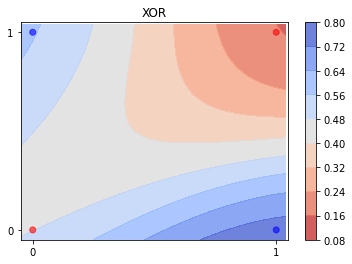

MLP's XOR probabilities: 
[class0, class1]
[[0.52142263 0.47857737]
 [0.43470858 0.56529142]
 [0.24747253 0.75252747]
 [0.83435312 0.16564688]]


In [8]:
plot_decision_boundary(mlp, X, y_XOR, 'XOR')
plt.show()

# get predictions
pred = mlp.predict_proba(X)
print("MLP's XOR probabilities: \n[class0, class1]\n{}".format(pred))

Learning rate modification
- The learning rate is a parameter which affects the size of the step an algorithm takes towards the optimal loss within gradient descent
- Max iterations are set back to 10,000
- As we increase the learning rate, we increase the distance between the ‘steps’ an algorithm takes towards its goal. 

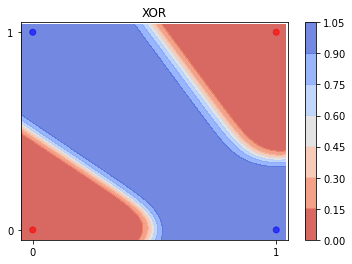

Learning rate: 0.4
MLP's XOR probabilities:
[class0, class1]
[[9.99379682e-01 6.20317711e-04]
 [1.13877862e-03 9.98861221e-01]
 [4.27808371e-07 9.99999572e-01]
 [9.99051325e-01 9.48675049e-04]]


In [21]:
# Compute XOR
# Setting the input samples.
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]],
            dtype=np.double)
y_XOR = np.array([0, 1, 1, 0])
# Create a MLPClassifier.
mlp = MLPClassifier(hidden_layer_sizes=(5,),
    activation='tanh',
    learning_rate_init=0.4, # big value to show a step too large
    max_iter=10000,
    random_state=10)
# Train model
mlp.fit(X, y_XOR)
# Plot and display the decision boundary
plot_decision_boundary(mlp, X, y_XOR, 'XOR')
plt.show()
# Get predicted values and print
pred = mlp.predict_proba(X)
print("Learning rate: 0.4")
print("MLP's XOR probabilities:\n[class0, class1]\n{}".format(pred))
